In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import math
import csv
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support 
import seaborn as sns
import plotly
plotly.__version__
import plotly.plotly as py
import plotly.tools as tls
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.cluster import KMeans
import seaborn as sns

/home/avijoy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Calculated Feature -> Split -> Train and Test

In [2]:
#     Citiation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy*100, misclass*100))
    plt.show()

In [3]:
def draw_histogram(df):
    ax = df.hist(column='Label', bins=6, grid=False, figsize=(6,4), color='#86bf91', zorder=2, rwidth=0.8)

    ax = ax[0]
    for x in ax:

        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.3, color='#eeeeee', zorder=1)
        x.set_title("")
        x.set_xlabel("Label", labelpad=20, weight='bold', size=12)
        x.set_ylabel("Numbers of Instances", labelpad=20, weight='bold', size=12)


In [4]:
def draw_sns_histogram(df):
    sns.set(style="darkgrid")
    ax = sns.countplot(x="Label", data=df)

In [5]:
def dataset_preprocessing(dataframe, column_name):
    
#     min_max_scaler = preprocessing.MinMaxScaler()
#     np_scaled = min_max_scaler.fit_transform(dataframe)
#     df_normalized = pd.DataFrame(np_scaled)
    
    scaler = preprocessing.StandardScaler()
    df_standardized = scaler.fit_transform(dataframe)
    dataframe = pd.DataFrame(df_standardized, columns=column_name)
    return dataframe
    

In [6]:
def split_function(dataframe):
    
    zero_label_df = dataframe[dataframe['Label'] == 0].copy()
    one_label_df = dataframe[dataframe['Label'] == 1].copy()
    two_label_df = dataframe[dataframe['Label'] == 2].copy()
    three_label_df = dataframe[dataframe['Label'] == 3].copy()
    four_label_df = dataframe[dataframe['Label'] == 4].copy()
    five_label_df = dataframe[dataframe['Label'] == 5].copy()

    train_upto = int(zero_label_df.shape[0]*train_percentage) 
    zero_train = zero_label_df[0:train_upto].copy()
    zero_test = zero_label_df[train_upto+1 : zero_label_df.shape[0]].copy()
    
    train_upto = int(one_label_df.shape[0]*train_percentage) 
    one_train = one_label_df[0:train_upto].copy()
    one_test = one_label_df[train_upto+1 : one_label_df.shape[0]].copy()
    
    train_upto = int(two_label_df.shape[0]*train_percentage) 
    two_train = two_label_df[0:train_upto].copy()
    two_test = two_label_df[train_upto+1 : two_label_df.shape[0]].copy()
    
    train_upto = int(three_label_df.shape[0]*train_percentage) 
    three_train = three_label_df[0:train_upto].copy()
    three_test = three_label_df[train_upto+1 : three_label_df.shape[0]].copy()
    
    train_upto = int(four_label_df.shape[0]*train_percentage) 
    four_train = four_label_df[0:train_upto].copy()
    four_test = four_label_df[train_upto+1 : four_label_df.shape[0]].copy()
    
    train_upto = int(five_label_df.shape[0]*train_percentage) 
    five_train = five_label_df[0:train_upto].copy()
    five_test = five_label_df[train_upto+1 : five_label_df.shape[0]].copy()
    
    # Merge and Return
    train = pd.concat([zero_train, one_train, two_train, three_train, four_train, five_train], ignore_index=True)
    test = pd.concat([zero_test, one_test, two_test, three_test, four_test, five_test], ignore_index=True)
    
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    
    return train, test

In [7]:
def cross_validation(dataset, ground_truth):
    
    ramdom_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=12,random_state=0)
    rf_scores = cross_val_score(ramdom_forest_classifier, input_dataset, ground_truth, cv=5)
    rf_predictions = cross_val_predict(ramdom_forest_classifier, input_dataset, ground_truth, cv=5)
    rf_accuracy = metrics.r2_score(ground_truth, rf_predictions)
    rf_cm = confusion_matrix(ground_truth, rf_predictions) 
    plot_confusion_matrix(cm           = rf_cm, 
                          normalize    = False,
                          target_names = ['Left-Ground', 'Left-Top', 'Right-Ground', 'Right-Top', 'Mid-Ground', 'Mid-Top'],
                          title        = "RF Confusion Matrix")
    #     precision_recall_fscore_support(ground_truth, rf_predictions, average='macro')
    
    
    decTree_clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=25, min_samples_split=2, min_samples_leaf=1, random_state=None)
    decTree_predictions = cross_val_predict(decTree_clf, input_dataset, ground_truth, cv=5)
    decTree_cm = confusion_matrix(ground_truth, decTree_predictions) 
    plot_confusion_matrix(cm           = decTree_cm, 
                          normalize    = False,
                          target_names = ['Left-Ground', 'Left-Top', 'Right-Ground', 'Right-Top', 'Mid-Ground', 'Mid-Top'],
                          title        = "Decicion Tree Confusion Matrix")
    
    
    svm_clf = svm.SVC(kernel='rbf', C = 30, gamma=17)
    svm_scores = cross_val_score(svm_clf, input_dataset, ground_truth, cv=5)
    svc_predictions = cross_val_predict(svm_clf, input_dataset, ground_truth, cv=5)
    svc_cm = confusion_matrix(ground_truth, svc_predictions) 

    plot_confusion_matrix(cm           = svc_cm, 
                          normalize    = False,
                          target_names = ['Left-Ground', 'Left-Top', 'Right-Ground', 'Right-Top', 'Mid-Ground', 'Mid-Top'],
                          title        = "SVM Confusion Matrix")
    
    
    logreg_clf = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
    logreg_scores = cross_val_score(logreg_clf, input_dataset, ground_truth, cv=5)
    logreg_predictions = cross_val_predict(logreg_clf, input_dataset, ground_truth, cv=5)
    logreg_cm = confusion_matrix(ground_truth, logreg_predictions)

    plot_confusion_matrix(cm           = logreg_cm, 
                          normalize    = False,
                          target_names = ['Left-Ground', 'Left-Top', 'Right-Ground', 'Right-Top', 'Mid-Ground', 'Mid-Top'],
                          title        = "LR Confusion Matrix")
    
    
    
    multi_linear_perceptron = MLPClassifier(solver='lbfgs', alpha=0.00005, hidden_layer_sizes=(32,32,6), activation='tanh')
    mlp_scores = cross_val_score(multi_linear_perceptron, input_dataset, ground_truth, cv=5)
    mlp_predictions = cross_val_predict(multi_linear_perceptron, input_dataset, ground_truth, cv=5)
    mlp_cm = confusion_matrix(ground_truth, mlp_predictions)

    plot_confusion_matrix(cm           = mlp_cm, 
                          normalize    = False,
                          target_names = ['Left-Ground', 'Left-Top', 'Right-Ground', 'Right-Top', 'Mid-Ground', 'Mid-Top'],
                          title        = "MLP Confusion Matrix")

## 1. Load Dataframes

In [8]:
home_url = os.getcwd()
url = os.path.abspath(os.path.join(home_url, '..', 'Extracted Data Files')) + "/"
feature_file = ['P1_feature_labeled','P2_feature_labeled','P3_feature_labeled','P4_feature_labeled']

In [9]:
P1_df = pd.read_csv(url + "P1_feature_labeled.csv")
P2_df = pd.read_csv(url + "P2_feature_labeled.csv")
P3_df = pd.read_csv(url + "P3_feature_labeled.csv")
P4_df = pd.read_csv(url + "P4_feature_labeled.csv")

## 2. Dataset Preprocessing

#### 2.1. Convert -INF, -INF in to NaN and drop NaNs

In [10]:
P1_df.replace([np.inf, -np.inf], np.NaN, inplace=True)
P2_df.replace([np.inf, -np.inf], np.NaN, inplace=True)
P3_df.replace([np.inf, -np.inf], np.NaN, inplace=True)
P4_df.replace([np.inf, -np.inf], np.NaN, inplace=True)

In [11]:
P1_df.dropna(inplace = True)
P2_df.dropna(inplace = True)
P3_df.dropna(inplace = True)
P4_df.dropna(inplace = True)

#### 2.2. Dataset Reindexing and Shuffling

In [12]:
P1_df = P1_df.sample(frac=1)
P2_df = P2_df.sample(frac=1)
P3_df = P3_df.sample(frac=1)
P4_df = P4_df.sample(frac=1)

train_percentage = 0.99

In [13]:
P1_ground_truth = P1_df['Label'].copy()
P1_user_truth = P1_df['User'].copy()

P2_ground_truth = P2_df['Label'].copy()
P2_user_truth = P2_df['User'].copy()

P3_ground_truth = P3_df['Label'].copy()
P3_user_truth = P3_df['User'].copy()

P4_ground_truth = P4_df['Label'].copy()
P4_user_truth = P4_df['User'].copy()

In [14]:
P1_df.drop(['Label', 'User'], axis=1, inplace=True)
P1_column_name = P1_df.columns

P2_df.drop(['Label', 'User'], axis=1, inplace=True)
P2_column_name = P2_df.columns

P3_df.drop(['Label', 'User'], axis=1, inplace=True)
P3_column_name = P3_df.columns

P4_df.drop(['Label', 'User'], axis=1, inplace=True)
P4_column_name = P4_df.columns

#### 2.3 Normalization and Standardization

In [15]:
P1_df = dataset_preprocessing(P1_df, P1_column_name)
P2_df = dataset_preprocessing(P2_df, P2_column_name)
P3_df = dataset_preprocessing(P3_df, P3_column_name)
P4_df = dataset_preprocessing(P4_df, P4_column_name)

In [16]:
P1_df = P1_df.join(P1_ground_truth)
P1_df = P1_df.join(P1_user_truth)

P2_df = P2_df.join(P2_ground_truth)
P2_df = P2_df.join(P2_user_truth)

P3_df = P3_df.join(P3_ground_truth)
P3_df = P3_df.join(P3_user_truth)

P4_df = P4_df.join(P4_ground_truth)
P4_df = P4_df.join(P4_user_truth)

#### 2.4 Split into 80-20

In [17]:
P1_train, P1_test = split_function(P1_df)
P2_train, P2_test = split_function(P2_df)
P3_train, P3_test = split_function(P3_df)
P4_train, P4_test = split_function(P4_df)

In [18]:
P1_train_ground_truth = np.array(P1_train['Label'])
P1_test_ground_truth = np.array(P1_test['Label'])

P2_train_ground_truth = np.array(P2_train['Label'])
P2_test_ground_truth = np.array(P2_test['Label'])

P3_train_ground_truth = np.array(P3_train['Label'])
P3_test_ground_truth = np.array(P3_test['Label'])

P4_train_ground_truth = np.array(P4_train['Label'])
P4_test_ground_truth = np.array(P4_test['Label'])

In [19]:
P1_train.drop(['Label', 'User'], axis=1, inplace=True)
P1_test.drop(['Label', 'User'], axis=1, inplace=True)

P2_train.drop(['Label', 'User'], axis=1, inplace=True)
P2_test.drop(['Label', 'User'], axis=1, inplace=True)

P3_train.drop(['Label', 'User'], axis=1, inplace=True)
P3_test.drop(['Label', 'User'], axis=1, inplace=True)

P4_train.drop(['Label', 'User'], axis=1, inplace=True)
P4_test.drop(['Label', 'User'], axis=1, inplace=True)

In [20]:
input_dataset = np.array(P1_train)

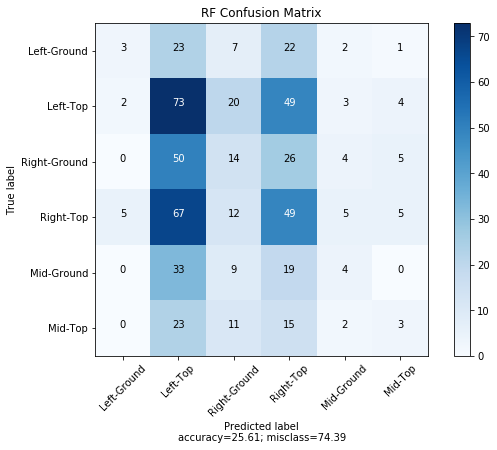

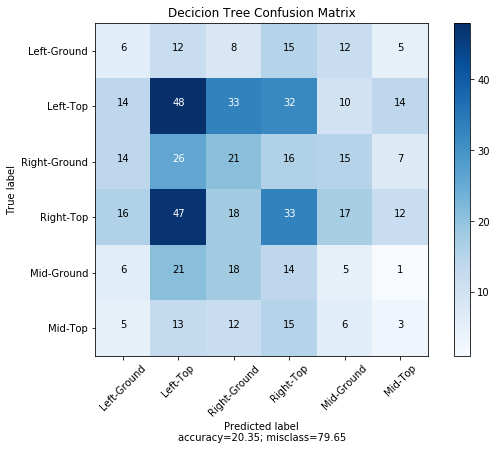

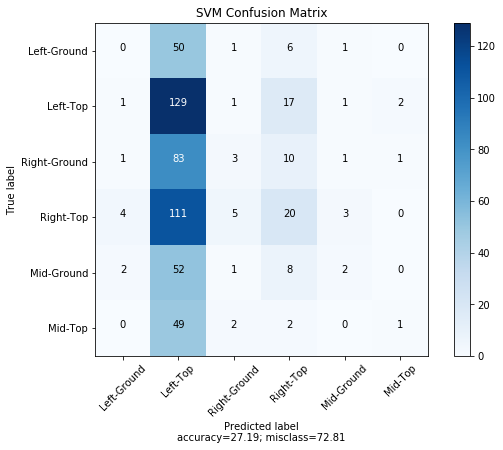

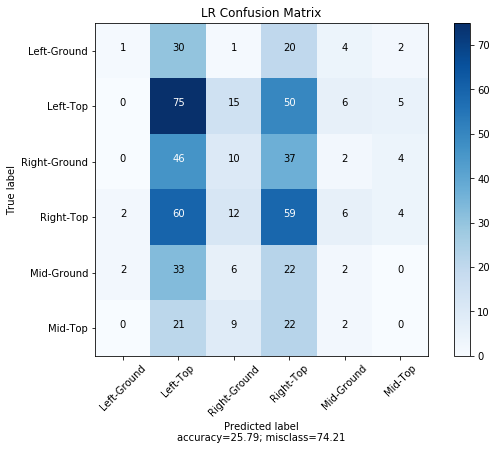

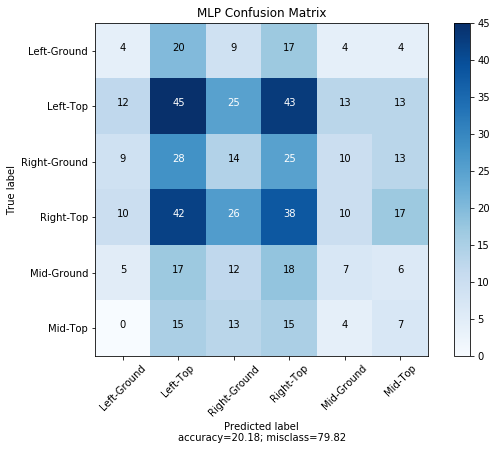

In [21]:
cross_validation(input_dataset, P1_train_ground_truth)

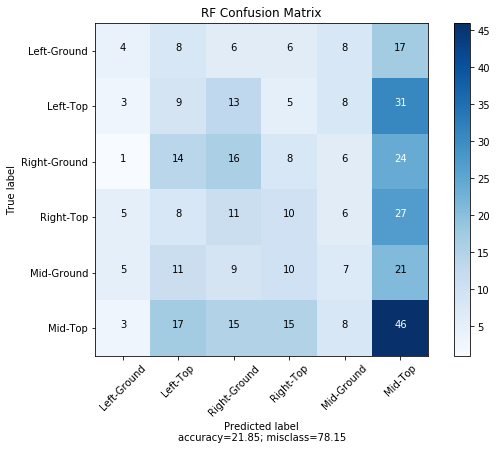

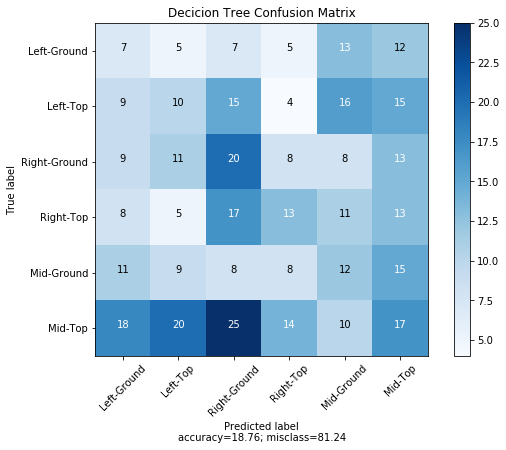

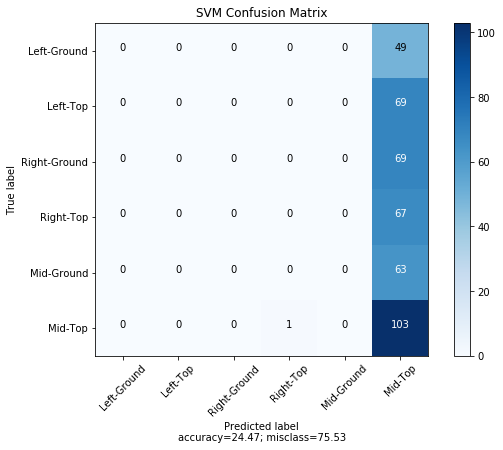

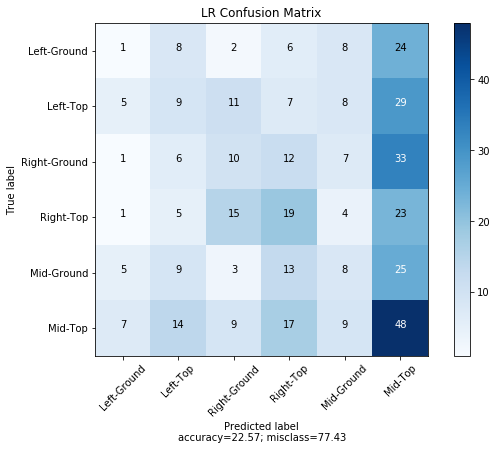

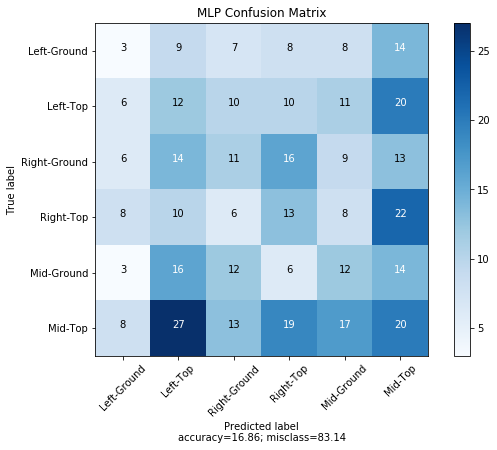

In [22]:
input_dataset = np.array(P2_train)
cross_validation(input_dataset, P2_train_ground_truth)